In [1]:
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
import pandas as pd

In [2]:
con_string = "DRIVER={SQL Server Native Client 11.0};SERVER=DESKTOP-2EFE3FO;DATABASE=KCC;trusted_connection=yes"
con_URL = URL.create("mssql+pyodbc", query={"odbc_connect": con_string})
print(con_URL)
engine = create_engine(con_URL)

mssql+pyodbc://?odbc_connect=DRIVER%3D%7BSQL+Server+Native+Client+11.0%7D%3BSERVER%3DDESKTOP-2EFE3FO%3BDATABASE%3DKCC%3Btrusted_connection%3Dyes


In [3]:
query = """
SELECT c.CustomerName AS [Customer Name], SUM(o.OrderTotal) AS [Total Order Cost]
FROM Customers c INNER JOIN
Orders o ON c.CustomerID = o.CustomerID
GROUP BY c.CustomerName
"""

In [4]:
df = pd.read_sql_query(query, engine)
df

,Customer Name,Total Order Cost
0,ABC Groceries,14870.0
1,ACME Bites,14706.0
2,Park & Shop Convenience Stores,17435.0
3,Tres Delicious,8418.0
4,Wholesome Foods,10462.0


In [5]:
import matplotlib.pyplot as plt

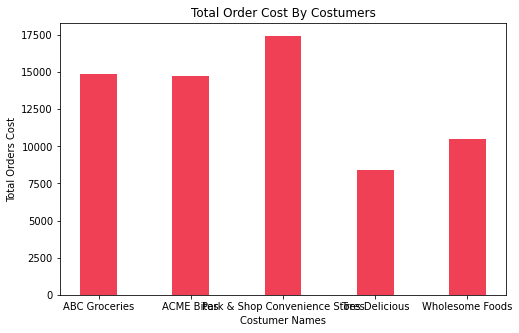

In [6]:
fig = plt.figure(figsize=(8,5))
customers = df.iloc[:,0].tolist()
total = df.iloc[:,1].tolist()
plt.bar(customers , total, color='#ef4056' , width=0.4)
plt.xlabel("Costumer Names")
plt.ylabel("Total Orders Cost")
plt.title("Total Order Cost By Costumers")
plt.show()

In [7]:
fig.savefig('plot.eps' , format='eps')